In [1]:
import gzip

import numpy as np
import matplotlib.pyplot as plt

from nnfs.models import BaseModel
from nnfs.layers import LinearLayer, Conv2DLayer, FlattenLayer
from nnfs.funcs import CrossEntropy
from nnfs.optimizers import Adam

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


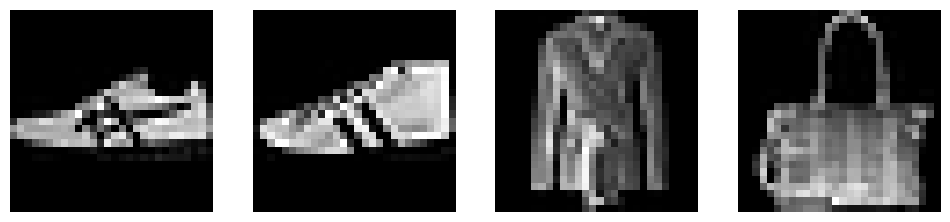

[7 7 6 8]


In [2]:
# Load datasets into numpy arrays
with gzip.open("data/fashion/train-images-idx3-ubyte.gz", "rb") as file:
    train_image = np.frombuffer(file.read(), np.uint8, offset=16).reshape(-1, 28, 28)
with gzip.open("data/fashion/t10k-images-idx3-ubyte.gz", "rb") as file:
    test_image = np.frombuffer(file.read(), np.uint8, offset=16).reshape(-1, 28, 28)

with gzip.open("data/fashion/train-labels-idx1-ubyte.gz", "rb") as file:
    train_labels = np.frombuffer(file.read(), np.uint8, offset=8)
with gzip.open("data/fashion/t10k-labels-idx1-ubyte.gz", "rb") as file:
    test_labels = np.frombuffer(file.read(), np.uint8, offset=8)


def draw_mnist_num(arr):
    """Helper function to draw MNIST numbers"""
    # Number of graphs
    nums = arr.shape[0]

    # Loop and graph
    fig, axes = plt.subplots(1, nums)
    for i in range(nums):
        axes[i].imshow(arr[i], cmap="gray")
        axes[i].set_axis_off()
    fig.set_size_inches(3 * nums, 3)
    plt.show()

# Confirm images and labels are aligned
rand_inds = np.random.choice(train_image.shape[0], 4, replace = False)
draw_mnist_num(train_image[rand_inds])
print(train_labels[rand_inds])

# Adjust labels to correspond to class output
train_label_arr = np.zeros((train_labels.shape[0], 10), dtype=int)
train_label_arr[np.arange(train_labels.shape[0]), train_labels] = 1
test_label_arr = np.zeros((test_labels.shape[0], 10), dtype=int)
test_label_arr[np.arange(test_labels.shape[0]), test_labels] = 1

# Convert from (0, 255) to (0, 1) range
train_image = train_image.copy() / 256
test_image = test_image.copy() / 256

In [3]:
layers = [
    Conv2DLayer((28, 28), (26, 26), (3, 3)),
    FlattenLayer((26, 26), (26 * 26)),
    LinearLayer((26 * 26), (100)),
    LinearLayer((100), (10))
]

# Train model
model = BaseModel(layers, optimizer = Adam(learning_rate=0.001))
model.train(
    [train_image, train_label_arr],
    [test_image, test_label_arr],
    CrossEntropy(),
    batch_size = 128,
    epochs = 20,
    full_test = True
)

Initialized model with 68719 parameters (268.4 KB).
Start of Epoch 1:


100%|██████████| 468/468 [00:26<00:00, 17.99it/s]


Average loss at epoch 1: 1.22889
Start of Epoch 2:


100%|██████████| 468/468 [00:24<00:00, 19.33it/s]


Average loss at epoch 2: 0.95445
Start of Epoch 3:


100%|██████████| 468/468 [00:21<00:00, 21.49it/s]


Average loss at epoch 3: 1.03440
Start of Epoch 4:


100%|██████████| 468/468 [00:21<00:00, 21.95it/s]


Average loss at epoch 4: 0.82335
Start of Epoch 5:


100%|██████████| 468/468 [00:22<00:00, 21.08it/s]


Average loss at epoch 5: 0.84221
Start of Epoch 6:


100%|██████████| 468/468 [00:23<00:00, 20.25it/s]


Average loss at epoch 6: 0.85752
Start of Epoch 7:


100%|██████████| 468/468 [00:28<00:00, 16.63it/s]


Average loss at epoch 7: 0.85542
Start of Epoch 8:


100%|██████████| 468/468 [00:21<00:00, 21.44it/s]


Average loss at epoch 8: 0.88656
Start of Epoch 9:


100%|██████████| 468/468 [00:25<00:00, 18.05it/s]


Average loss at epoch 9: 0.78178
Start of Epoch 10:


100%|██████████| 468/468 [00:23<00:00, 20.06it/s]


Average loss at epoch 10: 0.74141
Start of Epoch 11:


100%|██████████| 468/468 [00:22<00:00, 21.09it/s]


Average loss at epoch 11: 0.65211
Start of Epoch 12:


100%|██████████| 468/468 [00:22<00:00, 21.10it/s]


Average loss at epoch 12: 0.84487
Start of Epoch 13:


100%|██████████| 468/468 [00:20<00:00, 22.37it/s]


Average loss at epoch 13: 0.79093
Start of Epoch 14:


100%|██████████| 468/468 [00:25<00:00, 18.58it/s]


Average loss at epoch 14: 0.73348
Start of Epoch 15:


100%|██████████| 468/468 [00:22<00:00, 21.06it/s]


Average loss at epoch 15: 0.64925
Start of Epoch 16:


100%|██████████| 468/468 [00:25<00:00, 18.69it/s]


Average loss at epoch 16: 0.78536
Start of Epoch 17:


100%|██████████| 468/468 [00:20<00:00, 22.60it/s]


Average loss at epoch 17: 0.76817
Start of Epoch 18:


100%|██████████| 468/468 [00:22<00:00, 20.86it/s]


Average loss at epoch 18: 0.76228
Start of Epoch 19:


100%|██████████| 468/468 [00:24<00:00, 19.43it/s]


Average loss at epoch 19: 0.72941
Start of Epoch 20:


100%|██████████| 468/468 [00:21<00:00, 21.51it/s]


Average loss at epoch 20: 0.76199
Training took  0h  8m 25s.


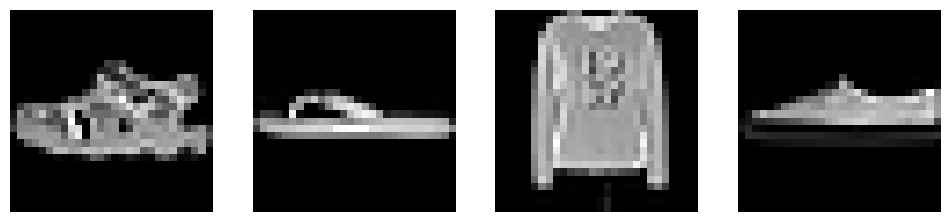

Model Guess: [5 5 2 7]
Actual Values: [5 5 2 7]
The model accuracy over the entire test set is 81.66%.


In [6]:
# Check if model can accurately label images
rand_inds = np.random.choice(train_image.shape[0], 4, replace = False)
draw_mnist_num(train_image[rand_inds])
model_guess = np.argmax(model.forward(train_image[rand_inds]), axis=1)
actual_val = train_labels[rand_inds]
print(f"Model Guess: {model_guess}")
print(f"Actual Values: {actual_val}")

# Find percent accuracy over entire test set
test_vals = model.forward(test_image)
test_accuracy = np.count_nonzero(np.argmax(test_vals, axis=1) == test_labels) / test_image.shape[0]
print(f"The model accuracy over the entire test set is {100 * test_accuracy:.2f}%.")

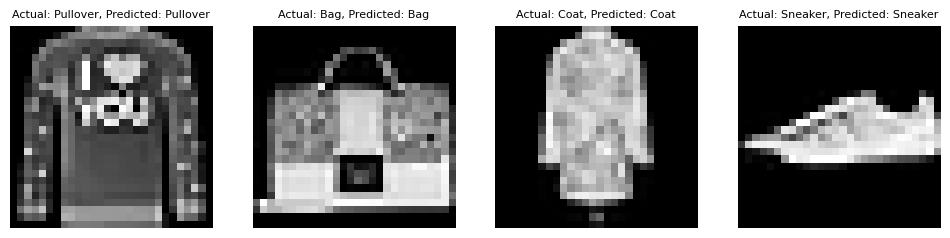

In [14]:
fashion_key = {
    0: "T-shirt/top",
    1: "Pant",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

def draw_sample_image(train_image, train_class, output_class):
    """Helper function to draw MNIST numbers"""
    # Number of graphs
    nums = train_image.shape[0]

    # Loop and graph
    fig, axes = plt.subplots(1, nums)
    for i in range(nums):
        axes[i].imshow(train_image[i], cmap="gray")
        actual_name = fashion_key[train_class[i]]
        pred_name = fashion_key[output_class[i]]
        axes[i].set_title(f"Actual: {actual_name}, Predicted: {pred_name}")
        axes[i].title.set_size(8)
        axes[i].set_axis_off()
    fig.set_size_inches(3 * nums, 3)
    plt.show()

rand_inds = np.random.choice(train_image.shape[0], 4, replace = False)
pred_class = np.argmax(model.forward(train_image[rand_inds]), axis=1)
draw_sample_image(train_image[rand_inds], train_labels[rand_inds], pred_class)